<img src="../images/matpl.png" alt="Drawing" style="width: 600px;"/>

Most of us don't spend much time in understanding `matplotlib` library. But we still fulfill our plotting needs as it turns out that many other people already have provided solutions for most of plotting problems on stackoverflow, github etc. We usually just rely on google to help us in making routine plots. Atleast I do. 

Reason of having a matplotlib cheatsheet and knowing about its basic interfaces is to save half an hour of Googling and combining stuff from various resources to edit our plot as per our needs. That's why spending sometime on understanding it would be helpful for long term and would save lots of time. 

Most of content is taken from below 2 links. Do visit those too. 

https://realpython.com/python-matplotlib-guide/#why-can-matplotlib-be-confusing
https://s3.amazonaws.com/assets.datacamp.com/blog_assets/Python_Matplotlib_Cheat_Sheet.pdf

In [2]:
%matplotlib inline 

In [3]:
# always import like this

import matplotlib.pyplot as plt

In [4]:
import numpy as np  # necessity
import pandas as pd  # necessity
np.random.seed(100)  # random seed set for reproducibility

Matplotlib is a Python 2D plotting library which produces publication-quality figures in a variety of hardcopy formats and interactive environments across platforms. 

* Interesting fact! Why the library always imported like `import matplotlib.pyplot as plt`?  
Because using like `from pylab import *` or `%pylab` is a bad practice and Matplotlib advices against it. Reason below 

`from pylab import *` still exists for historical reasons, but it is highly advised not to use. It pollutes namespaces with functions that will shadow Python built-ins and can lead to hard-to-track bugs. To get IPython integration without imports the use of the %matplotlib magic is preferred. [source](https://matplotlib.org/users/shell.html#using-matplotlib-in-a-python-shell)

**Finding different types of plots to draw using matplotlib is easy and many documents/tutorials can be found. Important thing is to know the best practices of plotting. How to use axes, subplots etc. This short notebook is focussed on that**

### Inline plotting and %Matplotlib

The `%matplotlib` magic command enables plotting in the current Notebook. This magic takes an optional argument that specifies which Matplotlib backend should be used. Most of the time, in the notebook, you will want to use the `inline` backend, which will embed plots inside the Notebook. Other option is `qt` backend which opens Matplotlib interactive UI in side window. 

**So there are multiple plotting UI that matplotlib offers which can be categorized like:**  

* Pop-up window and interactive:`%matplotlib qt` and `%matplotlib tk`
* Non interactive inline plots: `%matplotlib inline` 
* Interactive inline plots: `%matplotlib notebook` --> just don't use it. it makes switching difficult

### Understanding matplotlib object structure

`pyplot` is wrapper around object oriented interface of Matplotlib. 

#### `plt.gca()`
It gives current axis that plot() references 

In [338]:
fig, ax = plt.subplots(1,1) # 1,1 - means 1 row and 1 column (i.e one plot only)

print('figtype:', type(fig))
print('axis_type:' , type(ax))
print('plt_gca_id', id(plt.gca())) 
print('axis_id', id(ax))
plt.close()

figtype: <class 'matplotlib.figure.Figure'>
axis_type: <class 'matplotlib.axes._subplots.AxesSubplot'>
plt_gca_id 5006293088
axis_id 5006293088


The empty figure will be displayed if we don't use **plt.close()** because `inline` magic was used in the beginning. 

In [339]:
print('plt_gca_id', id(plt.gca()))  # new plot is made in new chunk. so new id
print('axis_id', id(ax)) # but ax is still a saved variable from last code chunk
plt.close()

plt_gca_id 5006390720
axis_id 5006293088


`axis_id` is still same but `plt.gca()` is now changed when we moved to a different block. 

#### `Setter and getter`

Getter and setter methods are used to grab current/any axes and do changes on it. We may want to change the title, color, legend, font etc. There are 2 ways to do this.   
1. call using getter of setter on **axes** object by specifying which axes to grab using `fig.axes[i]`. Example in above case we only have 1 axis. So we will call `axes[0]`  
2. we can directly call current axis using **plt.bla()** (bla can be title(), legend(), xlabel() etc.). This is basically a wrapper of pyplot around matplotlib's object oriented interface. This wrapper is makes it easy for user to change current axes object. So this is more often used than the former 

In [58]:
# getter example
one_tick = fig.axes[0].yaxis.get_major_ticks()[0]
print('Type is :', type(one_tick), '\n')

# setter example
print('set title :', fig.axes[0].yaxis.get_major_ticks()[0])
print('get title :', ax.get_title())

# check id of object
print('')
print('id of axes: ', id(fig.axes[0]))

# check with plt.bla()
plt.title('new random name')
print('id now:', id(plt))
plt.close()

Type is : <class 'matplotlib.axis.YTick'> 

set title : <matplotlib.axis.YTick object at 0x11788d780>
get title : 

id of axes:  4687932552
id now: 4495104264


So the idea when we use `fig.axes[i]`, we can call any previous axis object in any previous chunk but calling `plt.bla()` makes new axis object in every code chunk and call the current object only. So in above case, new `plt` object was only created when `plt.title()` was called

**Important observation:** Now, as we see that the syntax we generally use, which is calling plt.bla() on current axis is renewed in every code chunk. But by calling `fig.axes[0]`, we can work on previous axes objects also from any code chunk. This is `stateless (object oriented) approach` and is more customizable and comes in handy as graphs become more complex.  

So my suggession would be to always use `fig, ax = plt.subplots(_)` to first unpack axes and figure and assign each to a new variable. Then we can use getter and setter methods on those variables to do changes in the plots. Moreover this allows us to work on multiple axes at once rather than only working with current plot. `pyplot` is used only once to create subplots and then we use OO approach.  
  
  
**Conclusion:** I am going to start each different plot using `plt.subplots()` from now on. *{Please correct me if any one thinks that this observation is wrong}*  

#### Anatomy of figure in matplotib

<img src="../images/mat2.png" alt="Drawing" style="width: 600px;"/>
Source: https://matplotlib.org/faq/usage_faq.html

### Plotting basic example
Basic example on how to do plotting. Covers various aspects of Object Oriented plotting. Look carefully

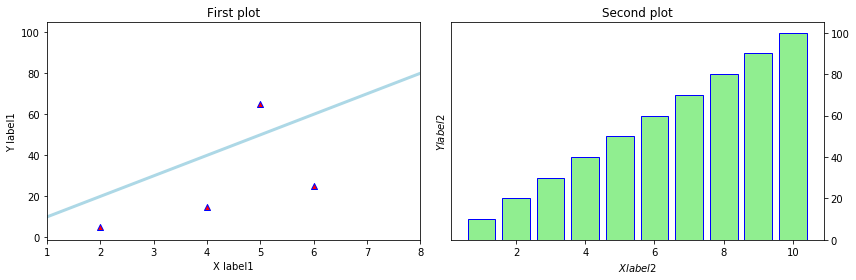

In [185]:
x = np.arange(1,11)
y1 = np.arange(10,101, 10)
y2 = np.arange(50,4,-5)
data = np.column_stack((y1, y2)) # just concatenating 2 column arrays


fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize = (12,4)) # 1st width, 2nd height

# customizing axis 1
ax1.plot(x, y1, color='lightblue', linewidth=3) # make line-plot on axis 1
ax1.scatter([2,4,6,5], [5,15,25, 65],           # add scatter plot in axis 1
           color='red',
           marker='^', 
            edgecolor = 'b')
ax1.set_xlim(1, 8)          # set limit of x axis
ax1.set_title('First plot') # set title
ax1.set_xlabel('X label1')
ax1.set_ylabel('Y label1')


# customizing axis 2
ax2.bar(x, y1, color='lightgreen', linewidth=1, edgecolor = 'blue' ) # make bar-plot on axis 2
ax2.set_title('Second plot')
ax2.set_xlabel('$X label2$')
ax2.set_ylabel('$Y label2$')
ax2.yaxis.tick_right()

fig.tight_layout()

**Summary of what is happening in above exmaple:**    
* We create 1 row and 2 col figure. i.e. 2 axes objects in 1 row and 2 columns   
* We customize ax1 and ax2 individually. Observe that we can move y-ticks to right side for 2nd plot  

### Working with 2-D grids
subplot2grid

**Need?**  
To make plots in below format. 

<img src="../images/grids.png" alt="Drawing" style="width: 600px;"/>

Idea is to think of above figure as **2x4** grid. Then assign multiple grids to single plots to accomodate needed figure

In [167]:
y3 = [1,1,1,1,4,4,4,5,5,5,5,5,5,7,7,6]

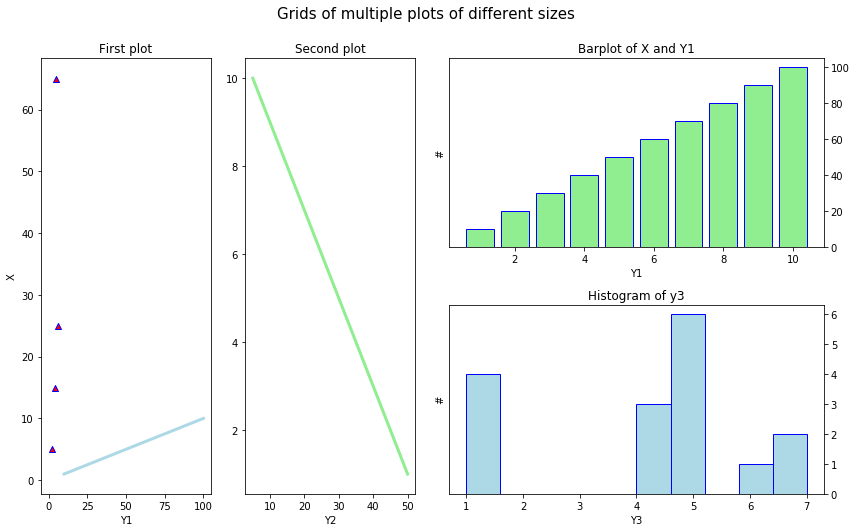

In [220]:
gridsize = (2, 4) # 4 rows, 2 columns
fig = plt.figure(figsize=(12, 7)) # this creates a figure without axes
ax1 = plt.subplot2grid(gridsize, (0, 0), colspan=1, rowspan=2) # 2nd argument = origin of individual box
ax2 = plt.subplot2grid(gridsize, (0, 1), colspan=1, rowspan=2)
ax3 = plt.subplot2grid(gridsize, (0, 2), colspan=2, rowspan=1)
ax4 = plt.subplot2grid(gridsize, (1, 2), colspan=2, rowspan=1)

# Now that we have made multiple axes, we can customize each plot individually

# customizing axis 1
ax1.plot(y1, x, color='lightblue', linewidth=3) # make line-plot on axis 1
ax1.scatter([2,4,6,5], [5,15,25, 65],           # add scatter plot in axis 1
           color='red',
           marker='^', 
            edgecolor = 'b')
ax1.set_title('First plot') # set title
ax1.set_xlabel('Y1')
ax1.set_ylabel('X')

# customizing axis 2
ax2.plot(y2, x, color='lightgreen', linewidth=3) # make line-plot on axis 1
ax2.set_xlabel('Y2')
ax2.set_title('Second plot')

# customizing axis 3
ax3.bar(x,y1, color= 'lightgreen', edgecolor = 'b')
ax3.set_title('Barplot of X and Y1')
ax3.set_xlabel('Y1')
ax3.set_ylabel('#')
ax3.yaxis.tick_right()

# customizing axis 4
ax4.hist(y3, color = 'lightblue', edgecolor = 'b')
ax4.set_title('Histogram of y3')
ax4.set_xlabel('Y3')
ax4.set_ylabel('#')
ax4.yaxis.tick_right()

# super title of figure
fig.suptitle('Grids of multiple plots of different sizes ', y = 1.05, fontsize=15)

# clean up whitespace padding
fig.tight_layout()

**Key takeways**: 
* We can customize the layout of our plots using `subplot2grid`  
* We `plt.figure()` creates a figure with no axes. We can add axes manually later.
* We can use `fig.suptitle()` to set overall title of whole figure

### Colors, Color Bars, RGB Arrays & Color Maps

Sofar, we have used `ax.plot(), ax.scatter(), ax.bar() and ax.hist()` basic plots. One more commonly used wrapper is **`ax.imshow()`** which is used to show colormaps or images/ RGB arrays

In [222]:
# creating random array of integers values

img = np.random.randint(0,400,100)
img = img.reshape((10,10)) # 10x10 image

In [223]:
img

array([[ 92, 245, 113, 343, 380, 285, 337, 230, 238,   7],
       [  4, 194, 275, 342,  82, 354, 180, 339,  76, 139],
       [293, 335, 379, 393, 241,  11, 286, 307, 154, 183],
       [115,  37, 245, 240, 292, 295, 338, 387,  33, 297],
       [ 53,   6, 112,  14, 382, 274, 274, 383,  94, 340],
       [ 15, 236,  77, 281,  47,  57,  26, 366, 237, 309],
       [303,  86, 113,  45, 136,  93, 135, 181,  36, 231],
       [162, 260, 140, 290,  93, 123, 271, 396, 341, 151],
       [323, 367, 316,  79, 393,  63, 328, 144, 127, 154],
       [246,  27,  88, 232, 151, 251,  58, 251, 140, 172]])

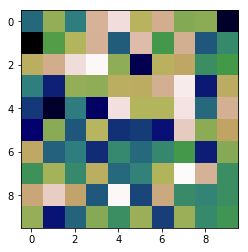

In [237]:
fig, ax = plt.subplots()
im = ax.imshow(img, cmap='gist_earth') # use of imshow 

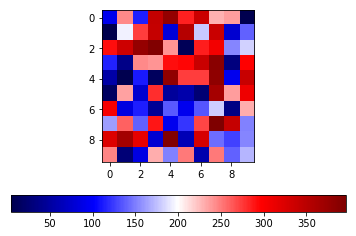

In [238]:
# adding a colorbar below plot to visualize the range of colors

im = ax.imshow(img, cmap='seismic')
fig.colorbar(im, orientation='horizontal')
fig

### Linestyles and linewidth 
Change widht, style color of lines

In [266]:
# let's see values of variables in case we forgot them

x,y1

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

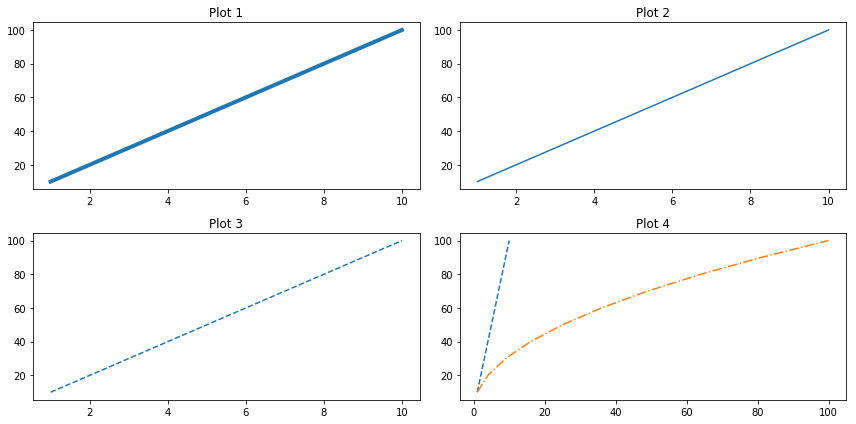

In [256]:
fig, axes = plt.subplots(2,2, figsize = (12,6)) # axes has all ax1 .. ax2 axes. 
ax1, ax2, ax3, ax4 = axes.flatten() # extracting all 4 axes using flatten

ax1.plot(x,y1, linewidth = 4) # set linewidth
ax1.set_title('Plot 1')

ax2.plot(x,y1, ls = 'solid')  # use solid line
ax2.set_title('Plot 2')

ax3.plot(x,y1, ls = '--') # dashed line
ax3.set_title('Plot 3')

ax4.plot(x,y1, '--', x**2, y1, '-.') # makes 2 lines. one dashed, other dotted dashed
ax4.set_title('Plot 4')


fig.tight_layout()

### Basic Data Distributions
Something we must do during EDA 

In [265]:
y3

[1, 1, 1, 1, 4, 4, 4, 5, 5, 5, 5, 5, 5, 7, 7, 6]

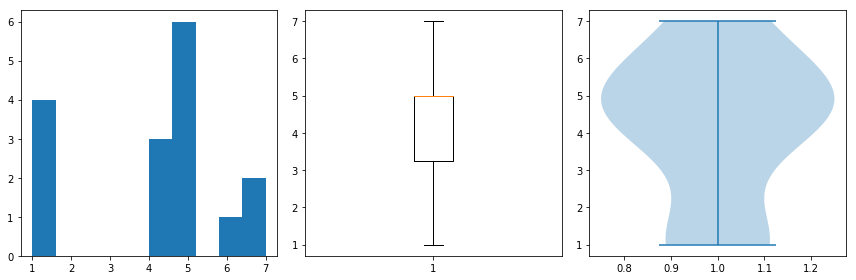

In [271]:
fig, axes = plt.subplots(1,3, figsize = (12,4))

# also we can directly index from axes variable
axes[0].hist(y3) # Plot a histogram
axes[1].boxplot(y3) # Make a box and whisker plot
axes[2].violinplot(y3) # violin plot

fig.tight_layout()

### Contours and Color grid for 2D arrays
Heatmap and contour map are really helpful to visualize 2d data in many cases

In [273]:
# cooking some data

data = 2 * np.random.random((10, 10))
data2 = 3 * np.random.random((10, 10))
data.shape, data2.shape

((10, 10), (10, 10))

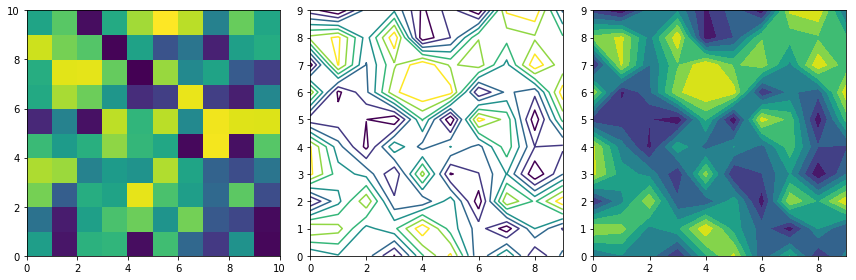

In [283]:
fig2, axes2 = plt.subplots(1,3, figsize = (12,4))

axes2[0].pcolor(data2)    # Pseudocolor plot of 2D array
axes2[1].contour(data)    # Contour plot
axes2[2].contourf(data)   # Filled contour plot

fig2.tight_layout()

### Adjustment, Margins and Scaling of plots
Last touch to make plots look nicer

#### Limits & Autoscaling

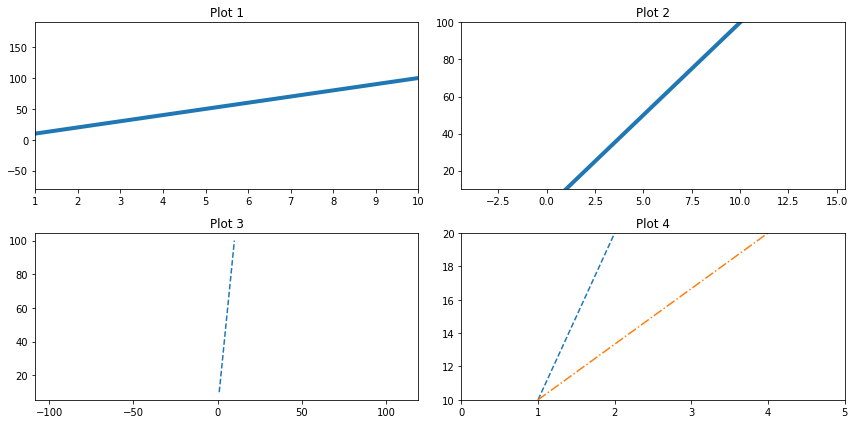

In [299]:
# copied pasted same line plots from above
fig, axes = plt.subplots(2,2, figsize = (12,6)) # axes has all ax1 .. ax2 axes. 
ax1, ax2, ax3, ax4 = axes.flatten() # extracting all 4 axes using flatten

ax1.plot(x,y1, linewidth = 4) # set linewidth
ax1.set_title('Plot 1')

ax2.plot(x,y1, linewidth = 4)  # use solid line
ax2.set_title('Plot 2')

ax3.plot(x,y1, ls = '--') # dashed line
ax3.set_title('Plot 3')

ax4.plot(x,y1, '--', x**2, y1, '-.') # makes 2 lines. one dashed, other dotted dashed
ax4.set_title('Plot 4')
ax4.set_label(['x', 'x_square'])

# setting margins now
ax1.margins(x=0.0,y=1)   # Add padding to a plot. a lot of padding to y, no paddig to x
ax2.margins(x=0.6,y=0)   # Add padding to a plot. a lot of padding to x, no paddig to y
ax3.axis('equal')        # Set the aspect ratio of the plot to 1. 
ax4.set(xlim=[0,5],
       ylim=[10,20])     # Set limits for x-and y-axis


fig.tight_layout()

**Things to notice:**
* **padding** automatically sets x axis or y axis grid scales  
* we can set x,y tick limits as we want using **xlim, ylim**

#### Ticks

In [309]:
x,y1

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10]),
 array([ 10,  20,  30,  40,  50,  60,  70,  80,  90, 100]))

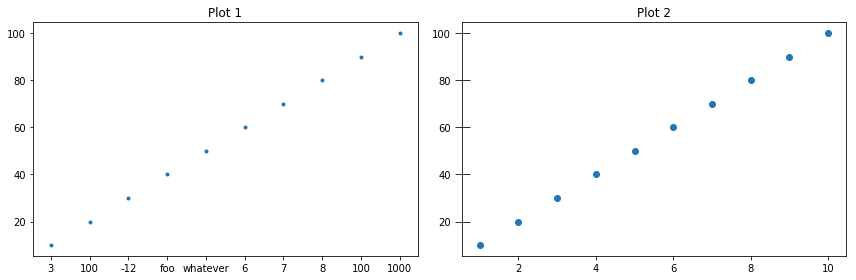

In [335]:
# basic scatter plots. bonus: see how to use marker
fig, (ax1,ax2) = plt.subplots(1,2, figsize = (12,4)) # axes has all ax1 .. ax2 axes. 

ax1.scatter(x,y1, marker='.') # set linewidth
ax1.set_title('Plot 1')

ax2.scatter(x,y1, marker="o")  # use solid line
ax2.set_title('Plot 2')

ax1.xaxis.set(ticks=range(1,11), # Manually set x-ticks
 ticklabels=[3,100,-12,"foo", 'whatever', 6,7,8,100,1000])

ax2.tick_params(axis='y',  # Make y-ticks longer and go in and out
               direction='inout',
               length=15)

fig.tight_layout()

#### Axis lines

In [336]:
ax1.spines['top'].set_visible(False)    # Make the top axis line for a plot invisible
ax1.spines['right'].set_visible(False) # Make the right axis line for a plot invisible


ax2.spines['bottom'].set_position(('outward',30)) # set position of bottom axis outward by scale of 30

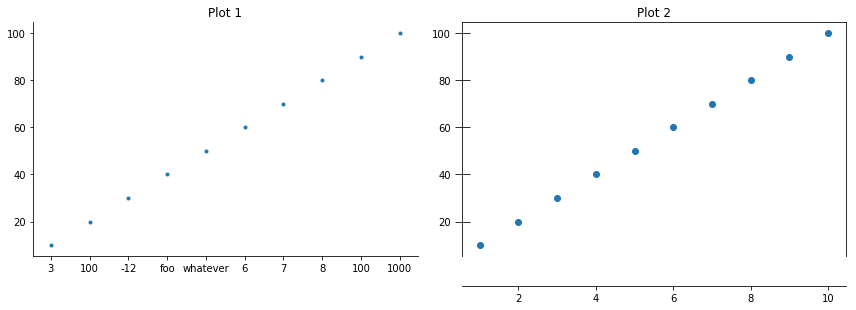

In [337]:
fig

### End